## Importing libraries

In [1]:
import pandas as pd # data preprocessing
import itertools # confusion matrix
import string
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
# To show all the rows of pandas dataframe
pd.set_option('display.max_rows', None)

In [8]:
df=pd.read_csv('C:\\Users\\USER\\train.csv')

C:\Users\USER\AppData\Local\Temp\ipykernel_5944\645926743.py:1: DtypeWarning: Columns (1,2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('C:\\Users\\USER\\train.csv')


In [9]:
df.head()

,uniqueID,drugName,condition,review
0,206461.0,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati..."
1,95260.0,Guanfacine,ADHD,"""My son is halfway through his fourth week of ..."
2,92703.0,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh..."
3,138000.0,Ortho Evra,Birth Control,"""This is my first time using any form of birth..."
4,35696.0,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around..."


In [10]:
df.condition.value_counts()

Birth Control                                            353
Depression                                               139
Pain                                                      88
Acne                                                      72
Anxiety                                                   67
ADHD                                                      53
Bipolar Disorde                                           47
Obesity                                                   43
Insomnia                                                  42
Emergency Contraception                                   38
Diabetes, Type 2                                          35
Weight Loss                                               35
Migraine                                                  28
High Blood Pressure                                       28
Urinary Tract Infection                                   28
Vaginal Yeast Infection                                   28
Panic Disorde           

In [121]:
df_train = df[(df['condition']=='Birth Control') | (df['condition']=='Depression') | (df['condition']=='High Blood Pressure')|(df['condition']=='Diabetes, Type 2')]

In [122]:
df.shape

(161297, 7)

In [123]:
df_train.shape

(42732, 7)

In [11]:
X = df.copy()

## EDA

In [12]:
X.condition.value_counts()

Birth Control                                            353
Depression                                               139
Pain                                                      88
Acne                                                      72
Anxiety                                                   67
ADHD                                                      53
Bipolar Disorde                                           47
Obesity                                                   43
Insomnia                                                  42
Emergency Contraception                                   38
Diabetes, Type 2                                          35
Weight Loss                                               35
Migraine                                                  28
High Blood Pressure                                       28
Urinary Tract Infection                                   28
Vaginal Yeast Infection                                   28
Panic Disorde           

In [13]:
X.head()

,uniqueID,drugName,condition,review
0,206461.0,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati..."
1,95260.0,Guanfacine,ADHD,"""My son is halfway through his fourth week of ..."
2,92703.0,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh..."
3,138000.0,Ortho Evra,Birth Control,"""This is my first time using any form of birth..."
4,35696.0,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around..."


## data preprocessing

In [14]:
X['review'][2]

'"I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestodene, which is not available in US, so I switched to Lybrel, because the ingredients are similar. When my other pills ended, I started Lybrel immediately, on my first day of period, as the instructions said. And the period lasted for two weeks. When taking the second pack- same two weeks. And now, with third pack things got even worse- my third period lasted for two weeks and now it&#039;s the end of the third week- I still have daily brown discharge.\r\nThe positive side is that I didn&#039;t have any other side effects. The idea of being period free was so tempting... Alas."'

In [15]:
X['review'][11]

'"I have taken anti-depressants for years, with some improvement but mostly moderate to severe side affects, which makes me go off them.\r\n\r\nI only take Cymbalta now mostly for pain.\r\n\r\nWhen I began Deplin, I noticed a major improvement overnight. More energy, better disposition, and no sinking to the low lows of major depression. I have been taking it for about 3 months now and feel like a normal person for the first time ever. Best thing, no side effects."'

In [18]:
X['review'] = X['review'].str.replace('"', '')
X.head()

,uniqueID,drugName,condition,review
0,206461.0,Valsartan,Left Ventricular Dysfunction,"It has no side effect, I take it in combinatio..."
1,95260.0,Guanfacine,ADHD,My son is halfway through his fourth week of I...
2,92703.0,Lybrel,Birth Control,"I used to take another oral contraceptive, whi..."
3,138000.0,Ortho Evra,Birth Control,This is my first time using any form of birth ...
4,35696.0,Buprenorphine / naloxone,Opiate Dependence,Suboxone has completely turned my life around....


In [19]:
# To set the width of the column to maximum
pd.set_option('max_colwidth', -1)

C:\Users\USER\AppData\Local\Temp\ipykernel_5944\999061969.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('max_colwidth', -1)


In [20]:
X.head()

,uniqueID,drugName,condition,review
0,206461.0,Valsartan,Left Ventricular Dysfunction,"It has no side effect, I take it in combination of Bystolic 5 Mg and Fish Oil"
1,95260.0,Guanfacine,ADHD,"My son is halfway through his fourth week of Intuniv. We became concerned when he began this last week, when he started taking the highest dose he will be on. For two days, he could hardly get out of bed, was very cranky, and slept for nearly 8 hours on a drive home from school vacation (very unusual for him.) I called his doctor on Monday morning and she said to stick it out a few days. See how he did at school, and with getting up in the morning. The last two days have been problem free. He is MUCH more agreeable than ever. He is less emotional (a good thing), less cranky. He is remembering all the things he should. Overall his behavior is better. \r\nWe have tried many different medications and so far this is the most effective."
2,92703.0,Lybrel,Birth Control,"I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestodene, which is not available in US, so I switched to Lybrel, because the ingredients are similar. When my other pills ended, I started Lybrel immediately, on my first day of period, as the instructions said. And the period lasted for two weeks. When taking the second pack- same two weeks. And now, with third pack things got even worse- my third period lasted for two weeks and now it&#039;s the end of the third week- I still have daily brown discharge.\r\nThe positive side is that I didn&#039;t have any other side effects. The idea of being period free was so tempting... Alas."
3,138000.0,Ortho Evra,Birth Control,"This is my first time using any form of birth control. I&#039;m glad I went with the patch, I have been on it for 8 months. At first It decreased my libido but that subsided. The only downside is that it made my periods longer (5-6 days to be exact) I used to only have periods for 3-4 days max also made my cramps intense for the first two days of my period, I never had cramps before using birth control. Other than that in happy with the patch"
4,35696.0,Buprenorphine / naloxone,Opiate Dependence,"Suboxone has completely turned my life around. I feel healthier, I&#039;m excelling at my job and I always have money in my pocket and my savings account. I had none of those before Suboxone and spent years abusing oxycontin. My paycheck was already spent by the time I got it and I started resorting to scheming and stealing to fund my addiction. All that is history. If you&#039;re ready to stop, there&#039;s a good chance that suboxone will put you on the path of great life again. I have found the side-effects to be minimal compared to oxycontin. I&#039;m actually sleeping better. Slight constipation is about it for me. It truly is amazing. The cost pales in comparison to what I spent on oxycontin."


In [21]:
from nltk.corpus import stopwords

stop = stopwords.words('english')


In [138]:
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [25]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

In [26]:
from bs4 import BeautifulSoup
import re

In [29]:
def review_to_words(raw_review):
    if isinstance(raw_review, str):
        # 1. Delete HTML 
        review_text = BeautifulSoup(raw_review, 'html.parser').get_text()
        # 2. Make a space
        letters_only = re.sub('[^a-zA-Z]', ' ', review_text)
        # 3. lower letters
        words = letters_only.lower().split()
        # 5. Stopwords 
        meaningful_words = [w for w in words if not w in stop]
        # 6. lemmatization
        lemmatized_words = [lemmatizer.lemmatize(w) for w in meaningful_words]
        # 7. space join words
        return ' '.join(lemmatized_words)
    else:
        return ''  # or any other default value

# Apply the function to the 'review' column
X['review_clean'] = X['review'].apply(review_to_words)


In [30]:
X.head()

,uniqueID,drugName,condition,review,review_clean
0,206461.0,Valsartan,Left Ventricular Dysfunction,"It has no side effect, I take it in combination of Bystolic 5 Mg and Fish Oil",side effect take combination bystolic mg fish oil
1,95260.0,Guanfacine,ADHD,"My son is halfway through his fourth week of Intuniv. We became concerned when he began this last week, when he started taking the highest dose he will be on. For two days, he could hardly get out of bed, was very cranky, and slept for nearly 8 hours on a drive home from school vacation (very unusual for him.) I called his doctor on Monday morning and she said to stick it out a few days. See how he did at school, and with getting up in the morning. The last two days have been problem free. He is MUCH more agreeable than ever. He is less emotional (a good thing), less cranky. He is remembering all the things he should. Overall his behavior is better. \r\nWe have tried many different medications and so far this is the most effective.",son halfway fourth week intuniv became concerned began last week started taking highest dose two day could hardly get bed cranky slept nearly hour drive home school vacation unusual called doctor monday morning said stick day see school getting morning last two day problem free much agreeable ever le emotional good thing le cranky remembering thing overall behavior better tried many different medication far effective
2,92703.0,Lybrel,Birth Control,"I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestodene, which is not available in US, so I switched to Lybrel, because the ingredients are similar. When my other pills ended, I started Lybrel immediately, on my first day of period, as the instructions said. And the period lasted for two weeks. When taking the second pack- same two weeks. And now, with third pack things got even worse- my third period lasted for two weeks and now it&#039;s the end of the third week- I still have daily brown discharge.\r\nThe positive side is that I didn&#039;t have any other side effects. The idea of being period free was so tempting... Alas.",used take another oral contraceptive pill cycle happy light period max day side effect contained hormone gestodene available u switched lybrel ingredient similar pill ended started lybrel immediately first day period instruction said period lasted two week taking second pack two week third pack thing got even worse third period lasted two week end third week still daily brown discharge positive side side effect idea period free tempting ala
3,138000.0,Ortho Evra,Birth Control,"This is my first time using any form of birth control. I&#039;m glad I went with the patch, I have been on it for 8 months. At first It decreased my libido but that subsided. The only downside is that it made my periods longer (5-6 days to be exact) I used to only have periods for 3-4 days max also made my cramps intense for the first two days of my period, I never had cramps before using birth control. Other than that in happy with the patch",first time using form birth control glad went patch month first decreased libido subsided downside made period longer day exact used period day max also made cramp intense first two day period never cramp using birth control happy patch
4,35696.0,Buprenorphine / naloxone,Opiate Dependence,"Suboxone has completely turned my life around. I feel healthier, I&#039;m excelling at my job and I always have money in my pocket and my savings account. I had none of those before Suboxone and spent years abusing oxycontin. My paycheck was already spent by the time I got it and I started resorting to scheming and stealing to fund my addiction. All that is history. If you&#039;re ready to stop, there&#039;s a good chance that suboxone will put you on the path of great life again. I have found the side-effects to be minimal compared to oxycontin. I&#039;m actually

## Creating features and Target Variable

In [31]:
X_feat=X['review_clean']
y=X['condition']

In [36]:
# Assuming X_feat and y are your feature and target variables
X_feat = X_feat[X_feat.index.isin(y.index)]
y = y[y.index.isin(X_feat.index)]

# Now you can proceed with train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_feat, y, test_size=0.3, random_state=0)



In [37]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [38]:
count_vectorizer = CountVectorizer(stop_words='english')

count_train = count_vectorizer.fit_transform(X_train)

count_test = count_vectorizer.transform(X_test)

In [39]:
count_train

<1391x5450 sparse matrix of type '<class 'numpy.int64'>'
	with 39567 stored elements in Compressed Sparse Row format>

## Machine Learning Model : Naive Bayes

accuracy:   0.298
Confusion matrix, without normalization


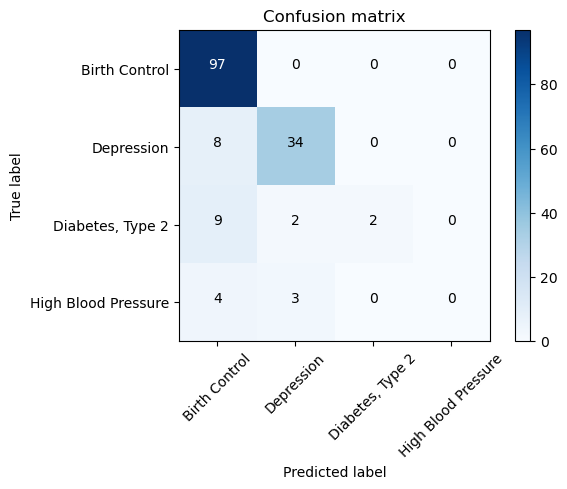

In [40]:
mnb = MultinomialNB()
mnb.fit(count_train, y_train)
pred = mnb.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

cm = metrics.confusion_matrix(y_test, pred, labels=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])
plot_confusion_matrix(cm, classes=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])

## Machine Learning Model : Passive Aggressive Classifier

accuracy:   0.390
Confusion matrix, without normalization


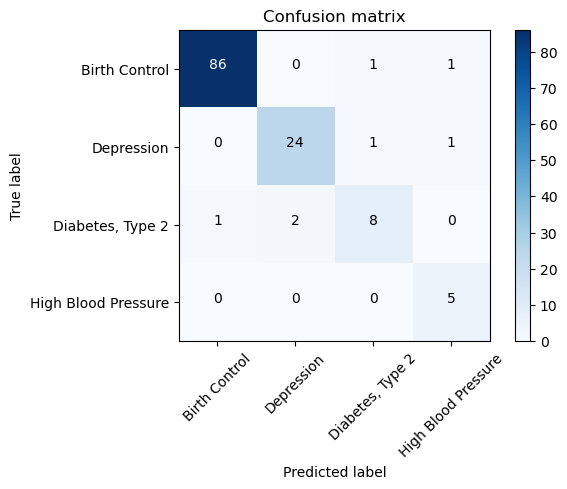

In [41]:
from sklearn.linear_model import PassiveAggressiveClassifier,LogisticRegression

passive = PassiveAggressiveClassifier()
passive.fit(count_train, y_train)
pred = passive.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])
plot_confusion_matrix(cm, classes=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])

### TFIDF

In [154]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.8)
tfidf_train_2 = tfidf_vectorizer.fit_transform(X_train)
tfidf_test_2 = tfidf_vectorizer.transform(X_test)

## Machine Learning Model : Naive Bayes

accuracy:   0.921
Confusion matrix, without normalization


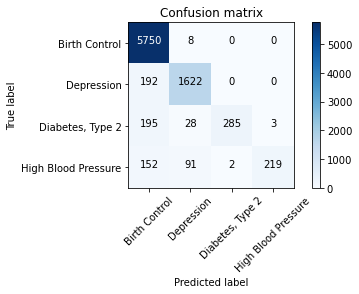

In [155]:
mnb_tf = MultinomialNB()
mnb_tf.fit(tfidf_train_2, y_train)
pred = mnb_tf.predict(tfidf_test_2)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])
plot_confusion_matrix(cm, classes=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])

## Machine Learning Model TFIDF

accuracy:   0.472
Confusion matrix, without normalization


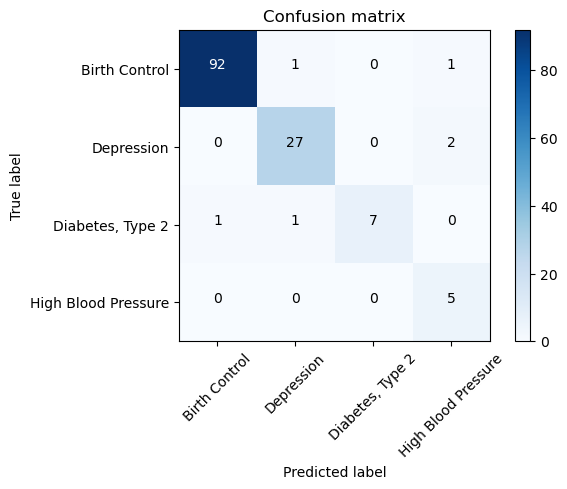

In [42]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.8)
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

pass_tf = PassiveAggressiveClassifier()
pass_tf.fit(tfidf_train, y_train)
pred = pass_tf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred, labels=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])
plot_confusion_matrix(cm, classes=['Birth Control', 'Depression','Diabetes, Type 2','High Blood Pressure'])


## Most important Features

In [44]:
def most_informative_feature_for_class(vectorizer, classifier, classlabel, n=10):
    labelid = list(classifier.classes_).index(classlabel)
    feature_names = vectorizer.get_feature_names()
    topn = sorted(zip(classifier.coef_[labelid], feature_names))[-n:]

    for coef, feat in topn:
        print (classlabel, feat, coef)



most_informative_feature_for_class(tfidf_vectorizer, pass_tf, 'Birth Control')

Birth Control bleed 2.0377897048309856
Birth Control period 2.082835504299611
Birth Control implanon 2.2493544681498068
Birth Control moody 2.353566253520601
Birth Control nexplanon 2.372954286251546
Birth Control lo 2.454867073114098
Birth Control skyla 2.505731913385674
Birth Control pill 2.5122450311959086
Birth Control nuvaring 2.633641645962269
Birth Control birth 2.6547978810102815


E:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


## Sample Predictions

In [48]:
X.tail()

,uniqueID,drugName,condition,review,review_clean
1994,130001.0,Levonorgestrel,Abnormal Uterine Bleeding,"Tried pill form birth control for a few years before getting off of it because it caused some strange mood swings/anxieties. Felt better off birth control for 1 full year but decided to try Mirena because I was getting my period after like 10 days from stress/etc. I took 4 Advil the morning of and the procedure was a bit uncomfortable but it kind of reminded me of getting an ear piercing ... it&#039;s painful but it&#039;s not like the worst type of pain ever. I just did a lot of deep breathing through it. Had cramping for a few days but just keep the Advil pumping! Discharge in the beginning, but pretty much smooth sailing now 2 months later. It&#039;s great!",tried pill form birth control year getting caused strange mood swing anxiety felt better birth control full year decided try mirena getting period like day stress etc took advil morning procedure bit uncomfortable kind reminded getting ear piercing painful like worst type pain ever lot deep breathing cramping day keep advil pumping discharge beginning pretty much smooth sailing month later great
1995,121066.0,Venlafaxine,Depression,"My doctor prescribed 37.5 mg to me. I took one at 3:00p.m. and by 7:00p.m. I was feeling dizzy and nauseous. I actually was able to fall asleep but woke up several times during the night with horrible nausea, shaking, anxiety, weird dreams, and the a lot of gas! Thank goodness I had Zofran for nausea or I would have thrown up. I also had to take an Ativan for the anxiety and Imodium for diarrhea. It&#039;s now 5:00p.m. the next day and I&#039;m just now feeling better. I know others who use Effexor and love it so it does work for some....just not for me. I called the doc and she quickly switched me to something else.",doctor prescribed mg took one p p feeling dizzy nauseous actually able fall asleep woke several time night horrible nausea shaking anxiety weird dream lot gas thank goodness zofran nausea would thrown also take ativan anxiety imodium diarrhea p next day feeling better know others use effexor love work called doc quickly switched something else
1996,163246.0,FreshKote,Eye Redness,This is the first prescription eye drops that has worked wonders for my severe dry eyes. Nothing else has worked but Fresh Kote has been a wonderful relief and it doesn&#039;t burn when I use it.,first prescription eye drop worked wonder severe dry eye nothing else worked fresh kote wonderful relief burn use
1997,131794.0,Effexor XR,Depression,"Effexor has been the most effective antidepressant for me. I&#039;ve tried 5 SSRI&#039;s. Effexor doesn&#039;t make me lazy or spaced out. I feel it helps my cognitive functioning, as well as focus, motivation and memory. I will go off effexor for periods of time, plenty of time for my brain/body to reset, but I keep finding it better to be on Effexor. It&#039;s helped me to not be so negative, irritable and just miserable overall. I can feel its slight pain killing effects as well. It keeps me doing things instead of laying in bed ruminating negative thoughts. Side effects for me are constipation and lower libido. Miralax fixes the first one. As for the second one, before Effexor I wasn&#039;t socializing at all anyways, so the I can handle that side effect.",effexor effective antidepressant tried ssri effexor make lazy spaced feel help cognitive functioning well focus motivation memory go effexor period time plenty time brain body reset keep finding better effexor helped negative irritable miserable overall feel slight pain killing effect well keep thing instead laying bed ruminating negative thought side effect constipation lower libido miralax fix first one second one effexor socializing anyways handle side effect
1998,163966.0,Fluorouracil,Warts,So I have had this wart on my thumb near my nail for about a year now. Finally I went to the derm and she told\r\nMe it was a periungal wart. I was told to use th

In [49]:
text =["I have only been on Tekturna for 9 days. The effect was immediate. I am also on a calcium channel blocker (Tiazac) and hydrochlorothiazide. I was put on Tekturna because of palpitations experienced with Diovan (ugly drug in my opinion, same company produces both however). The palpitations were pretty bad on Diovan, 24 hour monitor by EKG etc. After a few days of substituting Tekturna for Diovan, there are no more palpitations."]
test = tfidf_vectorizer.transform(text)
pred1=pass_tf.predict(test)[0]
pred1

'High Blood Pressure'

In [60]:
test=pd.read_csv('C:\\Users\\USER\\test.csv')


X_train_tfidf = tfidf_vectorizer.fit_transform(X['review_clean'])


X_train = X['review_clean']
y_train = X['condition']

X_test = test['review']


X_train_tfidf = tfidf_vectorizer.transform(X_train)

# Fitting model
pass_tf.fit(X_train_tfidf, y_train)


X_test_tfidf = tfidf_vectorizer.transform(X_test)
test['predicted_condition'] = pass_tf.predict(X_test_tfidf)

# Save the predictions to a CSV file
test[['predicted_condition']].to_csv('predicted_conditions.csv', index=False)

